### Notebook 3: X-Ray Fluorescence Plotting
This notebook shows how one might go about plotting x-ray fluorescence data, including the thickness and the composition.

In [1]:
import sys
import pandas as pd
sys.path.append('../lib')
#Note: When working in Windows environments, use:
#sys.path.append('..\lib')
from library import Library
from sample import Sample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

The code below selects a series of samples that have compositions including nickel, cobalt, and oxygen. It then recovers the concentrations available at each point along the substrate, listed in the same order as the compounds. One may now generate a number of figures based on this data.

In [2]:
samples_list = []
for lib in Library.search_by_composition(only = ['Co','Ni','O'], not_including = ['Zn'])[:2]:
    print('Library ID: ' + str(lib.identity))
    print(lib.properties().elements)
    samples_list = samples_list + list(lib.properties().sample_ids)
samples_list = [item for sublist in samples_list for item in sublist]
for samp in Sample.search_by_ids(samples_list)[:5]:
    print(samp.properties()[['xrf_compounds','xrf_concentration']])
compositions = []
for samp in Sample.search_by_ids(samples_list):
    compositions.append([samp.properties().xrf_compounds,samp.properties().xrf_concentration])
print compositions[:5]

Library ID: 8542
0    [Ni, O, Co]
Name: elements, dtype: object
Library ID: 8545
0    [Ni, O, Co]
Name: elements, dtype: object
     xrf_compounds               xrf_concentration
0  [NiO, CoO, ZnO]  [83.4199, 16.20741, 0.3726968]
     xrf_compounds                xrf_concentration
0  [NiO, CoO, ZnO]  [80.27798, 19.14649, 0.5755403]
     xrf_compounds                xrf_concentration
0  [NiO, CoO, ZnO]  [81.21519, 17.85205, 0.9327449]
     xrf_compounds               xrf_concentration
0  [NiO, CoO, ZnO]  [75.55929, 23.36569, 1.075025]
     xrf_compounds                xrf_concentration
0  [NiO, CoO, ZnO]  [74.54222, 25.03112, 0.4266521]
[[0    [NiO, CoO, ZnO]
Name: xrf_compounds, dtype: object, 0    [83.4199, 16.20741, 0.3726968]
Name: xrf_concentration, dtype: object], [0    [NiO, CoO, ZnO]
Name: xrf_compounds, dtype: object, 0    [80.27798, 19.14649, 0.5755403]
Name: xrf_concentration, dtype: object], [0    [NiO, CoO, ZnO]
Name: xrf_compounds, dtype: object, 0    [81.21519, 17.85205, 

The histogram below shows the concentrations of nickel oxide versus the concentrations of zinc oxide within a sample. This histogram tells us that the samples almost always contain more nickel oxide than zinc oxide.

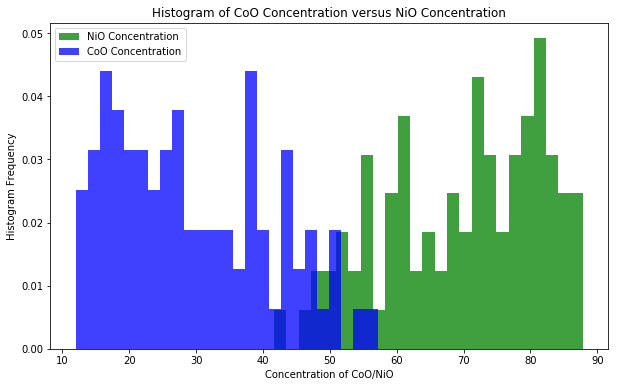

In [3]:
NiO_concentration = []
CoO_concentration = []
for i in compositions:
    NiO_concentration.append(list(i[1])[0][0])
    CoO_concentration.append(list(i[1])[0][1])
plt.figure(figsize=(10,6))
plt.title('Histogram of CoO Concentration versus NiO Concentration')
plt.xlabel('Concentration of CoO/NiO')
plt.ylabel('Histogram Frequency')
n, bins, patches = plt.hist(NiO_concentration, 25, normed=1, facecolor='green', alpha=0.75,label = 'NiO Concentration')
n, bins, patches = plt.hist(CoO_concentration, 25, normed=1, facecolor='blue', alpha=0.75,label = 'CoO Concentration')
plt.legend()
plt.show()

The code below takes a particular sample and parses the thicknesses along each of the points of the substrate.

In [4]:
sample_ids = list(Library(6880).properties().sample_ids)[0]
thickness_composition = []
for samp in Sample.search_by_ids(sample_ids):
    thickness_composition.append([int(samp.properties().position),float(samp.properties().thickness)])

The heatmap shows how the thickness of the library decreases from left to right. This would likely indicate that the power applied to the plasma on the left side is greater than the plasma applied to the right side of the substrate.

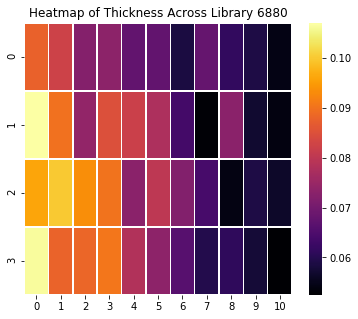

In [5]:
thickness_composition = sorted(thickness_composition)
thicknesses = [i[1] for i in thickness_composition]
thicknesses_array = np.array(thicknesses).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(thicknesses_array, linewidths=.5, ax=ax,cmap = 'inferno')
plt.title('Heatmap of Thickness Across Library 6880')
plt.show()

The code below is similar to the query which created the heatmap above, only this time it is taking the concentration values for the library 8545. This sample is a Zn-Ni-Co-O material according to XRF analysis, however it is listed by the researcher as intending to contain only nickel oxide and cobalt oxide. This may mean that the zinc oxide is a contaminant, perhaps left over from a previous test. This would indeed appear to be the case since, on closer examination, the concentration of zinc oxide in the sample tends to be less than 2%.

In [6]:
sample_ids = list(Library(8545).properties().sample_ids)[0]
concentration_composition = []
for samp in Sample.search_by_ids(sample_ids):
    concentration_composition.append([int(samp.properties().position),list(samp.properties().xrf_concentration)[0]])

The two heatmaps below are nearly perfect mirrors of each other (aside from the small amount of zinc oxide contaminant). The concentration of nickel oxide decreases from left to right across the substrate, meanwhile the concentration of cobalt oxide increases from left to right across the substrate.

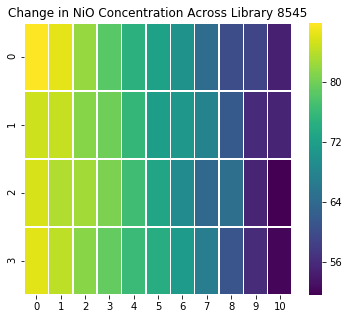

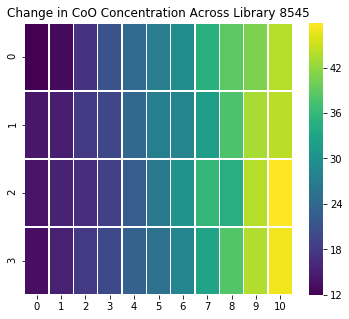

In [7]:
concentration_composition = sorted(concentration_composition)
NiO_concentration = [i[1][0] for i in concentration_composition]
NiO_concentration_array = np.array(NiO_concentration).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(NiO_concentration_array, linewidths=.5, ax=ax,cmap = 'viridis')
plt.title('Change in NiO Concentration Across Library 8545')
plt.show()

CoO_concentration = [i[1][1] for i in concentration_composition]
CoO_concentration_array = np.array(CoO_concentration).reshape(4,11)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(CoO_concentration_array, linewidths=.5, ax=ax,cmap = 'viridis')

plt.title('Change in CoO Concentration Across Library 8545')
plt.show()


In [8]:
sample_ids = list(Library(6651).properties().sample_ids)[0] + \
             list(Library(6658).properties().sample_ids)[0] + \
             list(Library(6701).properties().sample_ids)[0] + \
             list(Library(6710).properties().sample_ids)[0]
concentration_composition = []
for samp in Sample.search_by_ids(sample_ids):
    concentration_composition.append([float(samp.properties().thickness),\
                                      list(samp.properties().xrf_concentration)[0],\
                                      float(samp.properties().fpm_sheet_resistance)])

AttributeError: 'module' object has no attribute 'plt'

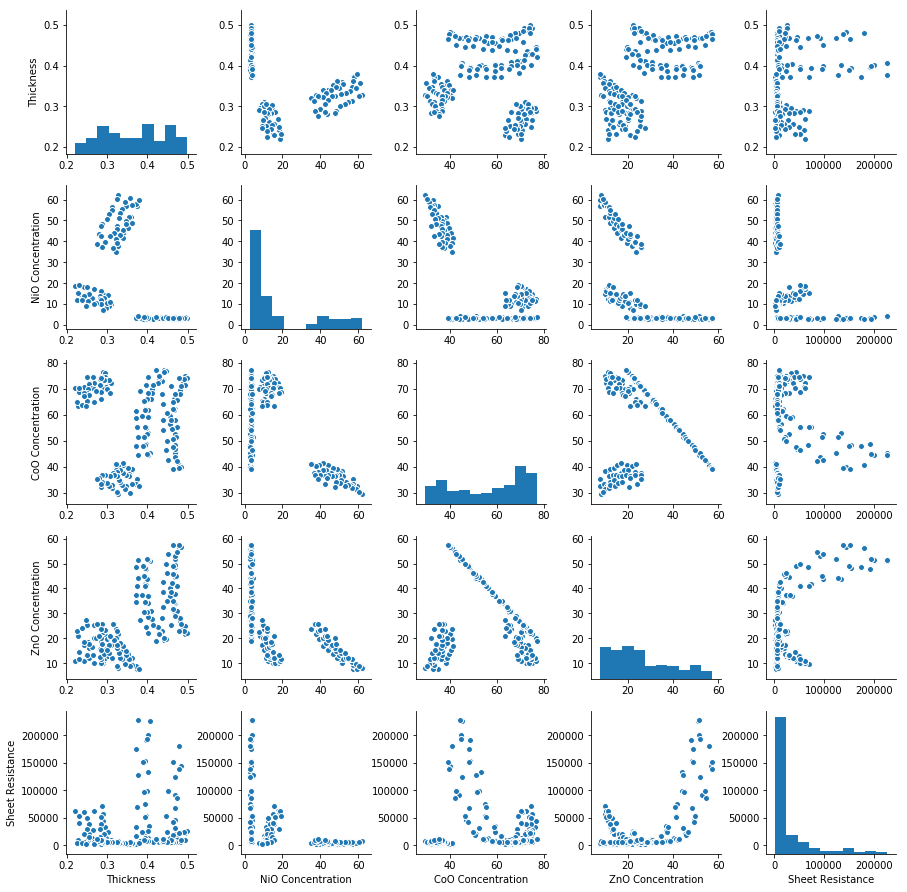

In [9]:
df = pd.DataFrame()
df['Thickness'] = [i[0] for i in concentration_composition]
df['NiO Concentration'] = [i[1][0] for i in concentration_composition]
df['CoO Concentration'] = [i[1][1] for i in concentration_composition]
df['ZnO Concentration'] = [i[1][2] for i in concentration_composition]
df['Sheet Resistance'] = [i[2] for i in concentration_composition]
plt.figure()
sns.pairplot(data=df)
sns.plt.suptitle('Seaborn Pairplot Comparison of Four Samples of Zn-Ni-Co-O Concentrations, Thicknesses, and Sheet Resistances')
plt.show()